In [1]:
#importing libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("fatalities_isr_pse_conflict_2000_to_2023.csv.zip")
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


About Dataset
Some Task Ideas:
Analyze Fatality Trends: Explore the dataset and track the trends in fatalities over time. Identify any significant changes, spikes, or declines in the number of fatalities.

Demographic Analysis:Conduct a demographic analysis by examining the age, gender, and citizenship of the individuals killed. Determine if there are any notable patterns or disparities in the data.

Geospatial Analysis: Utilize the event location, district, and region information to perform geospatial analysis. Visualize the distribution of fatalities on a map and identify areas that have experienced higher levels of violence.

Hostilities Participation Analysis:Investigate the extent of individuals' participation in hostilities before their deaths. Analyze the relationship between participation and the circumstances surrounding each fatality.

Injury Analysis: Examine the types of injuries inflicted on individuals. Identify the most common types of injuries and assess their severity.

Weapons Used: Analyze the ammunition and means by which the individuals were killed. Determine the most frequently used weapons or methods and evaluate their impact.

Victim Profiles: Create profiles of the victims based on the available data such as age, gender, citizenship, and place of residence. Identify common characteristics among the victims.

In [ ]:
Goal : 

In [3]:
df.shape

(11124, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [5]:
df["killed_by"].value_counts()

Israeli security forces    10000
Palestinian civilians       1028
Israeli civilians             96
Name: killed_by, dtype: int64

In [6]:
df.isna().sum()

name                               0
date_of_event                      0
age                              129
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

### Handling missing values

Cleaning
We will be doing the following;

1.address missing values
2.check for duplicate values
3.Remove unused column from dataset

In [7]:
df.drop("notes",inplace=True,axis=1)
#we drop notes column because we don't ned it it contains 10844 null values from 111117

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.isna().sum()

name                               0
date_of_event                      0
age                              121
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            14
took_part_in_the_hostilities    1430
place_of_residence                61
place_of_residence_district       61
type_of_injury                   290
ammunition                      5242
killed_by                          0
dtype: int64

<Axes: xlabel='killed_by', ylabel='age'>

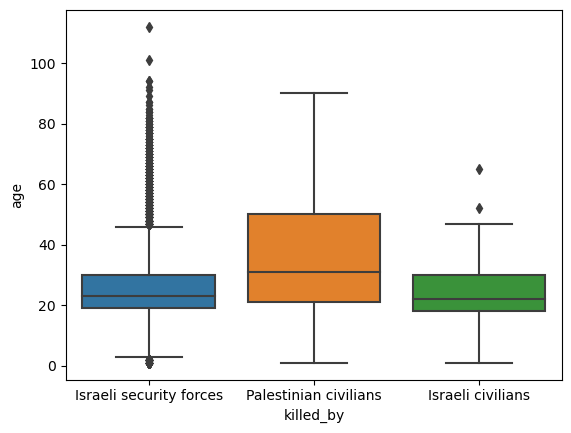

In [10]:
sns.boxplot(data=df,y="age",x="killed_by")

In [11]:
def fillage(col):
    age=col[0]
    killed_by=col[1]
    if pd.isnull(age):
        if killed_by=="israeli security forces":
            return 30
        elif killed_by=="palestinian civilians":
            return 24
        else:
            return 20
    else:
        return age

In [12]:
df["age"]=df[["age","killed_by"]].apply(fillage,axis=1)

In [13]:
df.dropna(subset=df.columns[8:14], inplace=True)

In [14]:
df.isnull().sum()

name                            0
date_of_event                   0
age                             0
citizenship                     0
event_location                  0
event_location_district         0
event_location_region           0
date_of_death                   0
gender                          0
took_part_in_the_hostilities    0
place_of_residence              0
place_of_residence_district     0
type_of_injury                  0
ammunition                      0
killed_by                       0
dtype: int64

### DATA VISUALIZATION

<Axes: xlabel='age', ylabel='Density'>

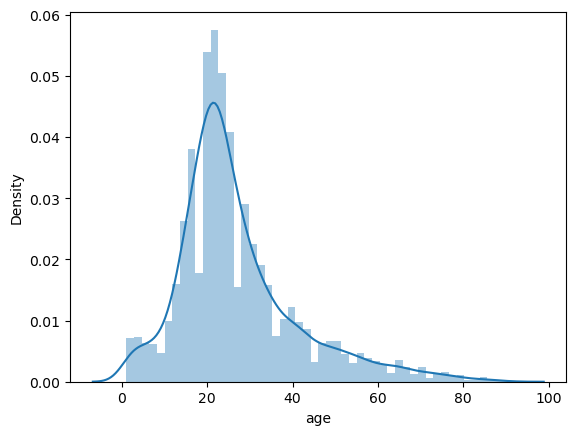

In [15]:
sns.distplot(df["age"])
# sns.kdeplot(df["age"],color="darkblue")

<Axes: xlabel='citizenship', ylabel='Count'>

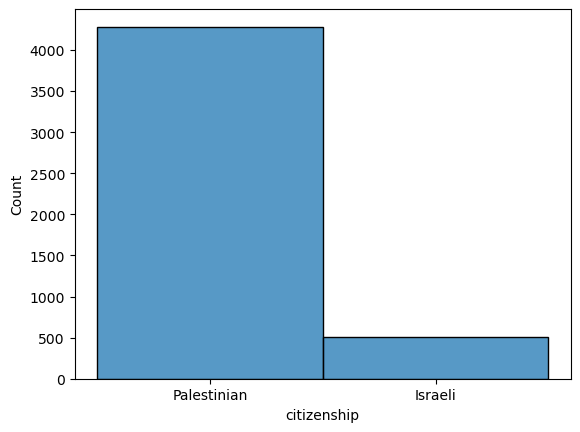

In [16]:
sns.histplot(df["citizenship"],palette="rainbow")

### Top 10 event locations

In [17]:
top_10_event_location=df["event_location_district"].value_counts()

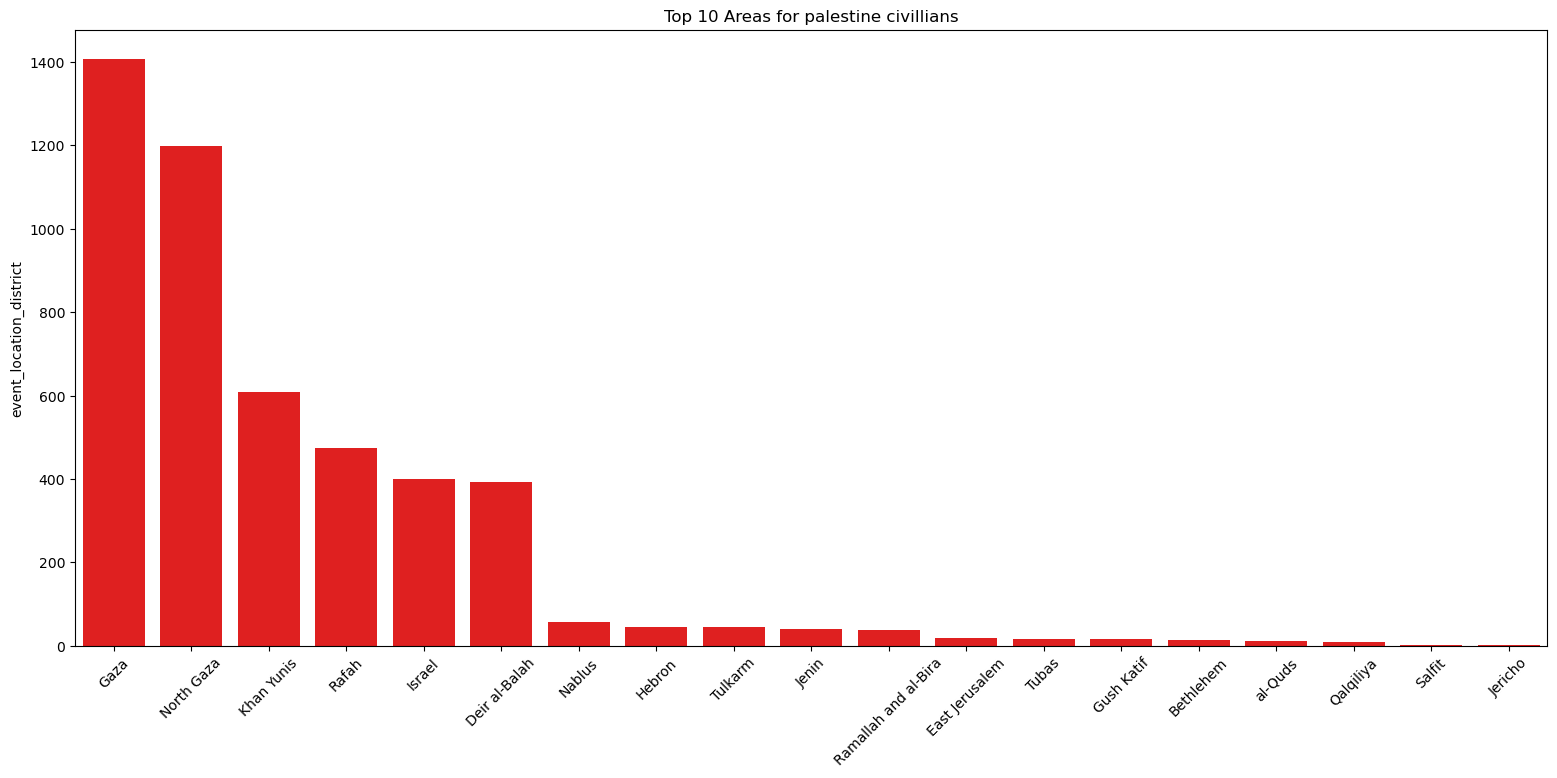

In [18]:
plt.figure(figsize=(19,8))
sns.barplot(
            y=top_10_event_location
            ,x=df["event_location_district"].value_counts().index
            ,color="red"
           )
plt.xlabel=("Event_location_district")
plt.ylabel=("Frequency")
plt.title("Top 10 Areas for palestine civillians")
plt.xticks(rotation=45)
plt.show()

### Gender graph by citizenship

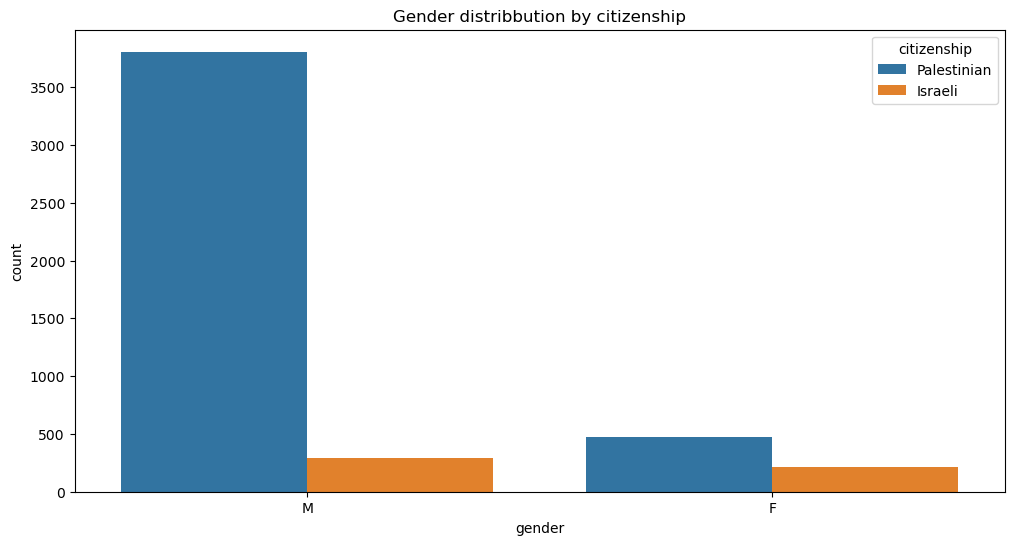

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x="gender",hue="citizenship")
plt.xlabel=("Gender")
plt.ylabel=("count")
plt.title("Gender distribbution by citizenship")
plt.show()

### Top 5 types of injury

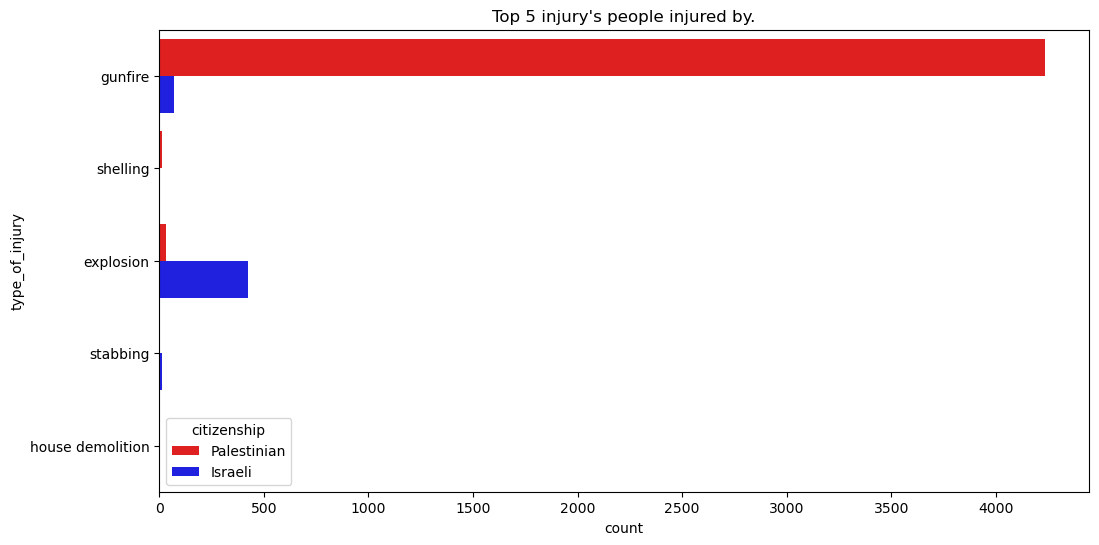

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,y="type_of_injury",hue="citizenship",palette=["red","blue"])
plt.xlabel=("count")
plt.ylabel=("injury type")
plt.title("Top 5 injury's people injured by.")
plt.show()

### Top 10 ammunition type

In [21]:
top_10_ammunition=df["ammunition"].value_counts().head(10)
df_filtered=df[df["ammunition"].isin(top_10_ammunition)]
                               #isin filters rows by values.

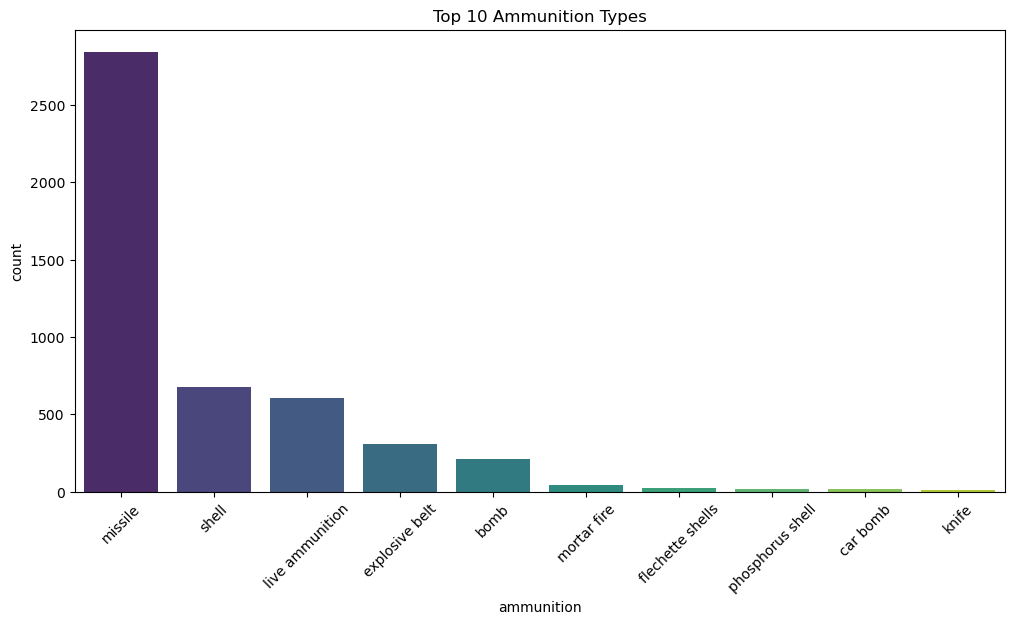

In [22]:
top_10_ammunition_types = df["ammunition"].value_counts().head(10).index

# Filter the DataFrame for the top 10 ammunition types
df_filtered = df[df["ammunition"].isin(top_10_ammunition_types)]
                                #isin filters rows by values.
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, x="ammunition", palette="viridis", order=top_10_ammunition_types)
plt.xticks(rotation=45)
plt.xlabel=("Ammunition Type")
plt.ylabel=("Count")
plt.title("Top 10 Ammunition Types")
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4791 entries, 6 to 11123
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          4791 non-null   object 
 1   date_of_event                 4791 non-null   object 
 2   age                           4791 non-null   float64
 3   citizenship                   4791 non-null   object 
 4   event_location                4791 non-null   object 
 5   event_location_district       4791 non-null   object 
 6   event_location_region         4791 non-null   object 
 7   date_of_death                 4791 non-null   object 
 8   gender                        4791 non-null   object 
 9   took_part_in_the_hostilities  4791 non-null   object 
 10  place_of_residence            4791 non-null   object 
 11  place_of_residence_district   4791 non-null   object 
 12  type_of_injury                4791 non-null   object 
 13  am

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


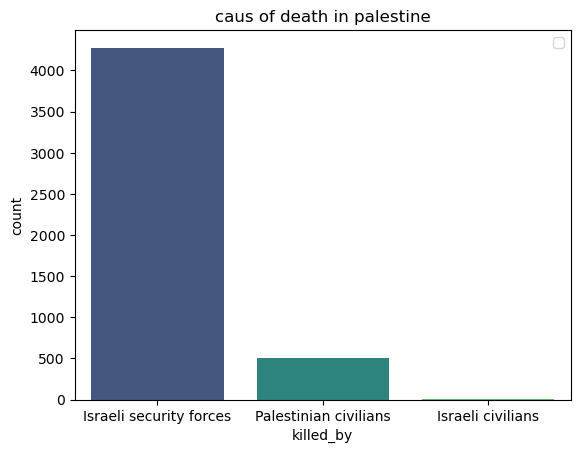

In [24]:
#what caused most people die in palestine.and plot a countplot graph of it.?

people_caused_by=df["killed_by"].value_counts().index
                                               #.index function finds positions/locations.
df_filtered=df[df["killed_by"].isin(people_caused_by)]

plt.figure()
sns.countplot(data=df_filtered,x="killed_by",palette="viridis")

plt.title("caus of death in palestine")
plt.xlabel=("cause of death")
plt.ylabel=("counts")
plt.legend()
plt.show()

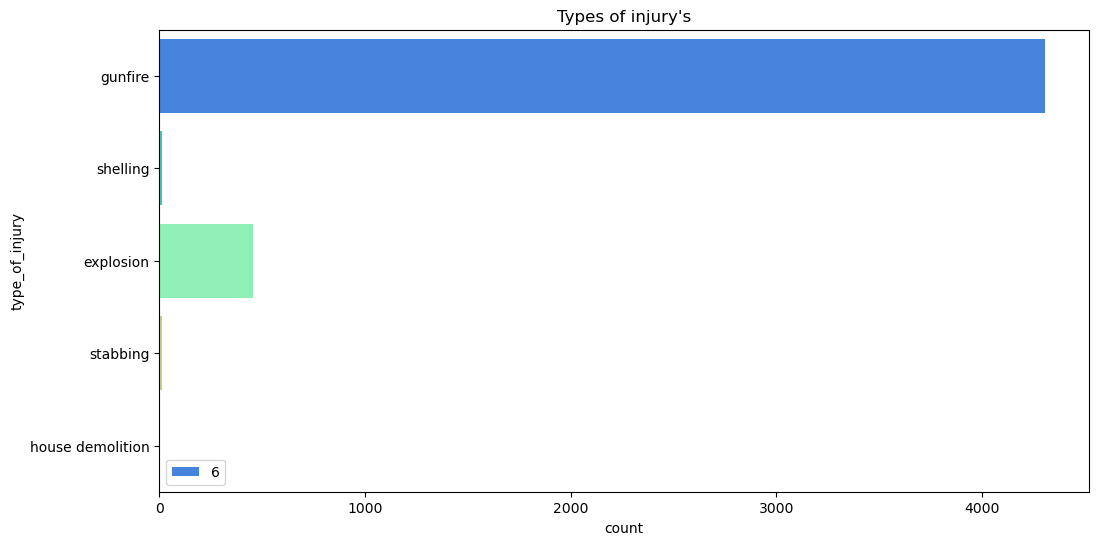

In [25]:
# Find Which type of injury occurs most frequently in the dataset?

injury_types=df["type_of_injury"].value_counts().index
injury_counts=df["type_of_injury"].head(5)

df_filtered=df[df["type_of_injury"].isin(injury_types)]

plt.figure(figsize=(12,6))
sns.countplot(data=df_filtered,y="type_of_injury",palette="rainbow")
plt.title("Types of injury's")
plt.ylabel=("Injury type")
plt.xlabel=("counts")
plt.legend(injury_counts.index)
plt.show()

### Number of fatalities by gender distribution

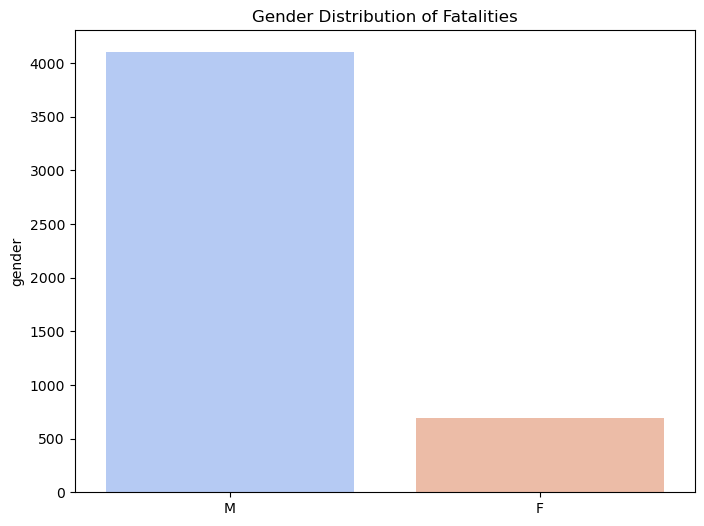

In [26]:
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts, palette="coolwarm")
plt.title('Gender Distribution of Fatalities')
plt.xlabel=('Gender')
plt.ylabel=('Number of Fatalities')
plt.show()

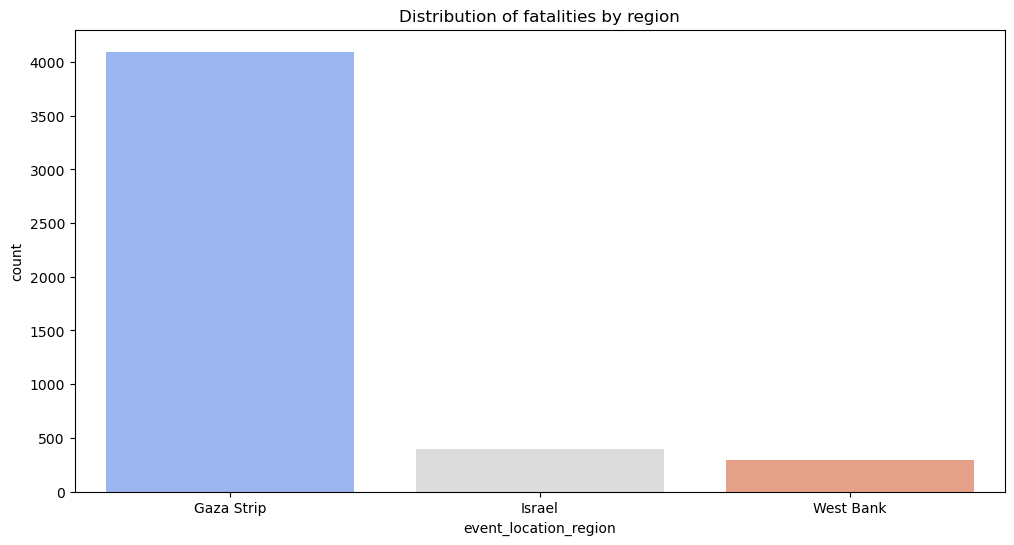

In [27]:
regions=df["event_location_region"].value_counts().index
df_filtered=df[df["event_location_region"].isin(regions)]

plt.figure(figsize=(12,6))
sns.countplot(data=df_filtered,x="event_location_region",palette="coolwarm")

plt.title("Distribution of fatalities by region")
plt.xlabel=("Region")
plt.ylabel=("Counts")
plt.show()